# Artificial Neural Network

- Installing Theano
conda install theano

- Installing Tensorflow
conda install tensorflow

- Installing Keras
conda install keras

## Part I - Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing dataset
dataset = pd.read_csv("D:\\Tensorflow\\Churn_Modelling.csv")

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
dataset.shape

(10000, 14)

In [6]:
# independent variables include the index from 3 to 12
# dependent variable is index 12
x = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [7]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
x[0:5,]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

In [10]:
# Encoding categorical data (country and gender)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x_1 = LabelEncoder()
x[:, 1] = labelencoder_x_1.fit_transform(x[:,1])

labelencoder_x_2 = LabelEncoder()
x[:, 2] = labelencoder_x_2.fit_transform(x[:,2])

In [11]:
print(x)

[[619 0 0 ... 1 1 101348.88]
 [608 2 0 ... 0 1 112542.58]
 [502 0 0 ... 1 0 113931.57]
 ...
 [709 0 0 ... 0 1 42085.58]
 [772 1 1 ... 1 0 92888.52]
 [792 0 0 ... 1 0 38190.78]]


In [12]:
onehotencoder = OneHotEncoder(categorical_features=[1])
x = onehotencoder.fit_transform(x).toarray()
x = x[:, 1:]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [14]:
print(x)

[[0.0000000e+00 0.0000000e+00 6.1900000e+02 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 1.0000000e+00 6.0800000e+02 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [0.0000000e+00 0.0000000e+00 5.0200000e+02 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [0.0000000e+00 0.0000000e+00 7.0900000e+02 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [1.0000000e+00 0.0000000e+00 7.7200000e+02 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [0.0000000e+00 0.0000000e+00 7.9200000e+02 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


### Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [17]:
X_train.shape

(8000, 11)

## Part II - Let's make the ANN!

In [18]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [19]:
# Initialising the ANN
classifier = Sequential()

In [20]:
# Adding the input layer and first hidden layer
classifier.add(Dense(output_dim=6, init='uniform', activation='relu',input_dim=11)) # add different layers in the neural network
# the hidden node=(11+1)/2 (which is 11 input node, 1 output node),initialize the weight with unifrom function,input_dim=11 as we have 11 independent variables


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`
  


In [21]:
# Adding the second hidden layer
classifier.add(Dense(output_dim=6, init='uniform', activation='relu'))
# as the second layer we will know what to expect because the first hidden layer was created, erase input_dim

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  


In [22]:
# Add the output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
# if we have output variable with more than two categories then activation function use softmax

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [23]:
# Compling the ANN(apply stochastic gradient descent on the whole ANN)
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# till now all the weights are still initialized,apply an algorithm to find the best weights,efficient one is Adam
# if the dependent variable has binary outcome then its binary_cross entropy, if its more than two outcomes then catigorical_cross entropy 

In [24]:
# Fitting the ANN to the training set
classifier.fit(X_train, y_train, batch_size=1, epochs=100)

Epoch 1/100
8000/8000 [==============================] - 14s 2ms/step - loss: 0.4357 - acc: 0.8100
Epoch 2/100
8000/8000 [==============================] - 15s 2ms/step - loss: 0.4032 - acc: 0.8300
Epoch 3/100
8000/8000 [==============================] - 14s 2ms/step - loss: 0.3824 - acc: 0.8371
Epoch 4/100
8000/8000 [==============================] - 15s 2ms/step - loss: 0.3750 - acc: 0.8455
Epoch 5/100
8000/8000 [==============================] - 14s 2ms/step - loss: 0.3689 - acc: 0.8490
Epoch 6/100
8000/8000 [==============================] - 15s 2ms/step - loss: 0.3619 - acc: 0.8490
Epoch 7/100
8000/8000 [==============================] - 14s 2ms/step - loss: 0.3612 - acc: 0.8499
Epoch 8/100
8000/8000 [==============================] - 15s 2ms/step - loss: 0.3596 - acc: 0.8526
Epoch 9/100
8000/8000 [==============================] - 14s 2ms/step - loss: 0.3573 - acc: 0.8525
Epoch 10/100
8000/8000 [==============================] - 14s 2ms/step - loss: 0.3566 - acc: 0.8535
Epoch 11/

8000/8000 [==============================] - 13s 2ms/step - loss: 0.3405 - acc: 0.8608
Epoch 83/100
8000/8000 [==============================] - 14s 2ms/step - loss: 0.3412 - acc: 0.8621
Epoch 84/100
8000/8000 [==============================] - 14s 2ms/step - loss: 0.3407 - acc: 0.8620
Epoch 85/100
8000/8000 [==============================] - 14s 2ms/step - loss: 0.3406 - acc: 0.8600
Epoch 86/100
8000/8000 [==============================] - 14s 2ms/step - loss: 0.3400 - acc: 0.8600
Epoch 87/100
8000/8000 [==============================] - 14s 2ms/step - loss: 0.3392 - acc: 0.8616
Epoch 88/100
8000/8000 [==============================] - 14s 2ms/step - loss: 0.3405 - acc: 0.8609
Epoch 89/100
8000/8000 [==============================] - 14s 2ms/step - loss: 0.3396 - acc: 0.8600
Epoch 90/100
8000/8000 [==============================] - 14s 2ms/step - loss: 0.3413 - acc: 0.8579
Epoch 91/100
8000/8000 [==============================] - 13s 2ms/step - loss: 0.3412 - acc: 0.8591
Epoch 92/100


## Part III - Making the predictions and evaluating the model

In [25]:
# predicting the Test set results
y_pred = classifier.predict(X_test)

In [26]:
print(y_pred)

[[0.20473348]
 [0.29808107]
 [0.16785046]
 ...
 [0.15867671]
 [0.11815   ]
 [0.26064718]]


# Making the Confusion Matrix

In [27]:
# convert percentage into True or False format
y_pred = (y_pred > 0.5)

In [37]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')
    
    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.5234567901234568


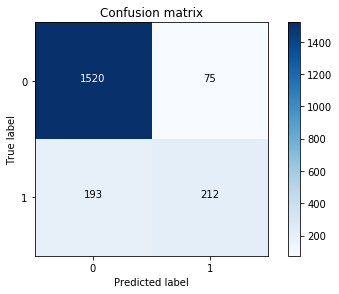

In [49]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cm[1,1]/(cm[1,1]+cm[1,0]))


# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [51]:
print("Accuracy metric in the testing dataset: ", (cm[0,0]+cm[1,1])/2000)

Accuracy metric in the testing dataset:  0.866


## Predicting a single new observation

predict if the customer with the following information will leave the bank:
 
 - Geography: France
 - Credit Score: 600
 - Gender: Male
 - Age: 40
 - Tenure: 3
 - Banlance: 60000
 - Number of Products: 2
 - Has Credit Card: yes
 - Is Active Member: yes
 - Estimated Salary: 50000

In [31]:
new_prediction = classifier.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
# 1.[] column , [[]] row; 2.sc.transform; 3. 0.0
new_prediction = (new_prediction > 0.5)

In [32]:
print(new_prediction)

[[False]]


Here it shows the customer would not leave the bank